QUESTION 1

Obtained value of m: [0.69726169]
Obtained value of c: [0.08213284]
Obtained line: y=[0.69726169]x+[0.08213284]
Obtained value of b2: [0.60287497]
Obtained value of b1: [0.4269699]
Obtained value of b0: [0.28146318]
Obtained polynomial: y=[0.60287497]x**2+[0.4269699]x+[0.28146318]


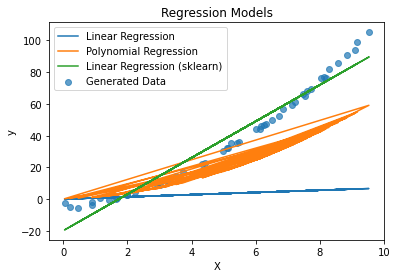

In [29]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)
x = 10 * rng.rand(50)
y = (x**2) + 2 * x - 5 + rng.randn(50)
n=x.shape[0]
def cost1(y1_hat, y):
    l = abs((y1_hat - y) ** 3)/2 
    cost1 = l.mean()
    return cost1
def cost2(y2_hat, y):
    l = abs((y2_hat - y) ** 7)/2 
    cost2 = l.mean()
    return cost2
def hypothesis1(x,m,c):
    return m*x+c
def hypothesis2(x,b0,b1,b2):
    return b2*(x**2)+b1*x+b0
def gradient_descent1(x,y,m,c,learning_rate1,n):
   y1_hat=hypothesis1(x,m,c)
   dm = (3.0/(2*n)) * np.sum(np.multiply(x,(y1_hat-y)**2))
   dc = (3.0/(2*n)) * np.sum((y1_hat-y)**2)
   m = m - learning_rate1 * dm
   c = c - learning_rate1 * dc
   return m,c
def gradient_descent2(x,y,b0,b1,b2,learning_rate2,n):
   y2_hat=hypothesis2(x,b0,b1,b2)
   db2 = (7.0/(2*n)) * np.sum(np.multiply(x**2,(y2_hat-y)**6))
   db1 = (7.0/(2*n)) * np.sum(np.multiply(x,(y2_hat-y)**6))
   db0 = (7.0/(2*n)) * np.sum((y2_hat-y)**6)
   b2 = b2 - learning_rate2 * db2
   b1 = b1 - learning_rate2 * db1
   b0 = b0 - learning_rate2 * db0
   return b2,b1,b0
# Random Initialisation
m = np.random.rand(1)
c = np.random.rand(1)
# Random Initialisation
b2 = np.random.rand(1)
b1 = np.random.rand(1)
b0 = np.random.rand(1)
# Hyperparameters
learning_rate1 = 0.0000000000005
learning_rate2 = 0.0000000000000000000005
num_epochs = 100000

# Train linear regression with |x - xhat|^3 loss
L1=[]
for i in range(num_epochs):
    m, c = gradient_descent1(x,y,m,c,learning_rate1,n)
    y1_hat = hypothesis1(x,m,c)
    L1.append(cost1(y1_hat,y))
print(f"Obtained value of m: {m}")
print(f"Obtained value of c: {c}")
print(f"Obtained line: y={m}x+{c}")

# Train polynomial regression with |x - xhat|^7 loss
L2=[]
for j in range(num_epochs):
    b2,b1,b0 = gradient_descent2(x,y,b0,b1,b2,learning_rate2,n)
    y2_hat = hypothesis2(x,b0,b1,b2)
    L2.append(cost2(y2_hat,y))
print(f"Obtained value of b2: {b2}")
print(f"Obtained value of b1: {b1}")
print(f"Obtained value of b0: {b0}")
print(f"Obtained polynomial: y={b2}x**2+{b1}x+{b0}")

# Train linear regression with sklearn
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x.reshape(-1,1),y)
y_sklearn = regressor.predict(x.reshape(-1,1))

#plots
plt.scatter(x,y,alpha=0.7,label='Generated Data')
plt.plot(x,y1_hat,label='Linear Regression')
plt.plot(x,y2_hat,label='Polynomial Regression')
plt.plot(x, y_sklearn, label='Linear Regression (sklearn)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Models')
plt.legend()
plt.show()

QUESTION 2

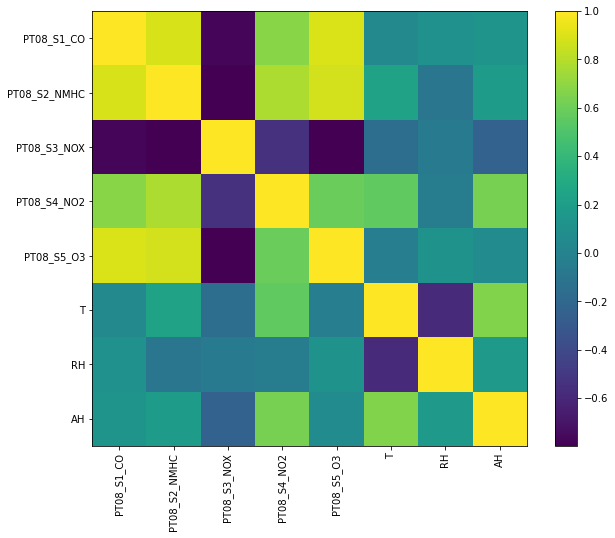

Numpy - R2 Score: 0.8669265474464113 MSE: 38.6045095086243
Sklearn - R2 Score: 0.8669265474464115 MSE: 38.60450950862424


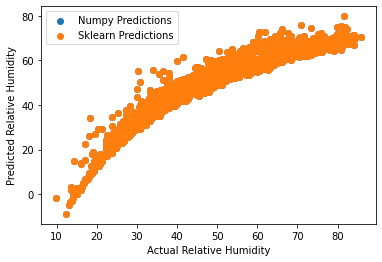

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']
r=list(np.arange(len(col)))
df=pd.read_csv("AirQualityUCI\\AirQualityUCI.csv", delimiter=";", decimal=",",header=None,skiprows=1,names=col,usecols=r)
df.dropna(how='all',inplace=True)
# Replace missing values with NaN
df.replace(-200, np.nan, inplace=True)
df = df.drop(['DATE','TIME', 'CO_GT', 'NMHC_GT', 'C6H6_GT', 'NOX_GT', 'NO2_GT'], axis=1)
# Handle missing values
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Get insights from the correlation matrix
correlation_matrix = df_imputed.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="viridis", interpolation="none")
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

# Dealing with outliers (you can use other methods based on the insights from the correlation matrix)
# For simplicity, we'll remove rows with any NaN values
df_cleaned = df_imputed.dropna()

# Extract the target variable (Relative Humidity)
X = df_cleaned.drop("RH", axis=1)
y = df_cleaned["RH"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Add a bias term to the features
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Train the linear regression model using Numpy
theta = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train)

# Predict on the test set
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_numpy = X_test_bias.dot(theta)

# Train the linear regression model using Sklearn
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

# Predict on the test set
y_pred_sklearn = model_sklearn.predict(X_test)

# Calculate R2 Score and Mean Squared Error for both models
r2_numpy = r2_score(y_test, y_pred_numpy)
mse_numpy = mean_squared_error(y_test, y_pred_numpy)

r2_sklearn = r2_score(y_test, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

# Compare the results
print("Numpy - R2 Score:", r2_numpy, "MSE:", mse_numpy)
print("Sklearn - R2 Score:", r2_sklearn, "MSE:", mse_sklearn)

# Plot the results
plt.scatter(y_test, y_pred_numpy, label='Numpy Predictions')
plt.scatter(y_test, y_pred_sklearn, label='Sklearn Predictions')
plt.xlabel('Actual Relative Humidity')
plt.ylabel('Predicted Relative Humidity')
plt.legend()
plt.show()
